Links zu Dokumentationen/Tutorials für IPython/Python/numpy/matplotlib/git sowie die Sourcodes findet ihr im [GitHub Repo](https://github.com/BerndSchwarzenbacher/numdiff).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Die Differentialgleichung lautet:
$v(t) = k'(t) = 2 * \frac{ \begin{pmatrix}0\\t\end{pmatrix} - k(t) }
{ \left\lVert \begin{pmatrix}0\\t\end{pmatrix} - k(t) \right\rVert }$

###Optionen:

In [2]:
step = 10**(-3)
tol = 10**(-6)

`vstack` schachtelt zwei arrays übereinander. Die Maus hat in der x-Koordinate (1. Zeile) immer 0 und die y-Koordinate (2. Zeile) durchläuft das Intervall [0, 1-step] mit Schrittweite `step`.

In [3]:
length = 1/step
mouse = np.vstack((np.zeros(length-1), np.arange(0, 1-step, step)))
cat = np.zeros((2, length))
cat[0, 0] = 1 # x-Koordinate der Katze zum Zeitpunkt 0, Anfangswert

###Explizites Eulerverfahren - Iteration:

In [4]:
for i, m in enumerate(mouse.transpose()):
    direction = m - cat[:,i]
    distance = np.linalg.norm(direction)
    
    # Abbruch, wenn die Katze die Maus fängt
    if distance <= tol:
        caught = i
        break
        
    cat[:,i+1] = cat[:,i] + step * 2 * direction / distance

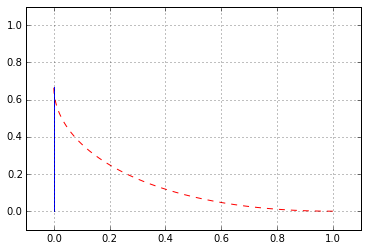

In [5]:
plt.plot(cat[0,:caught], cat[1,:caught], 'r--', mouse[0,:caught], mouse[1,:caught], 'b')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.grid()
plt.show()

Wo die Katze die Maus gefangen hat. y-Koordinate ist auch Zeit.

In [6]:
print(mouse[:,caught])

[ 0.     0.667]
